In [1]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 假设目标函数 y = sin(2*pi*x)
def real_func(x):
    return np.sin(2*np.pi*x)

In [3]:
# 多项式的值
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

In [4]:
# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
# 正则惩罚系数
regularization = 0.0001

In [6]:
# 正则化后的残差 L(w) = L(w,b) + lamda/2*||w||**2
def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [7]:
# 模拟点
x = np.linspace(0, 1, 10) #均分10个点
x_points = np.linspace(0, 1, 1000)
# 目标函数对应的y_值
y_ = real_func(x)
# 加上正态分布噪音的目标函数值
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

In [8]:
def fitting(M=0):
    '''
    M 多项式次数
    '''
    # 随机初始化多项式系数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y)) # 三个参数：误差函数、函数参数列表、数据点
    print('Fitting Parameters:', p_lsq[0])
    
    plt.subplot(141+index)
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.00846922]
Fitting Parameters: [-1.31587563  0.66640704]
Fitting Parameters: [ 21.67341968 -31.71972789  10.22884185   0.03429894]
Fitting Parameters: [ 2.58074594e+04 -1.20250227e+05  2.36344430e+05 -2.54383464e+05
  1.62621082e+05 -6.24537459e+04  1.38286080e+04 -1.58894841e+03
  7.48752591e+01  1.37408472e-01]


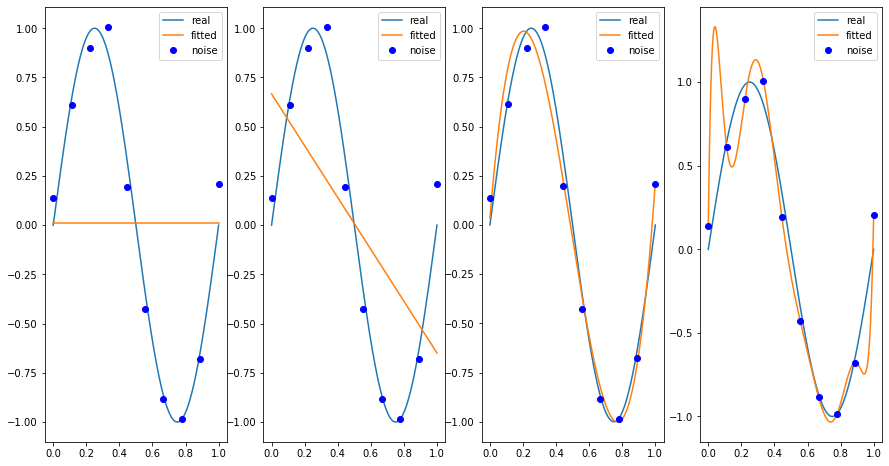

In [9]:
index = 0
plt.figure(figsize=(15, 8))
for i in [0, 1, 3, 9]:
    lsq_0 = fitting(i)
    index += 1

In [10]:
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.50, right=0.95, hspace=0.55, wspace=0.35) 
plt.show()

<Figure size 432x288 with 0 Axes>